## Execute & animating random quantum circuit on Qiskit Aer

In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
initial_ket_0 = [1,0] 
initial_ket_1 = [0,1]
initial_ket_1 = [0,1]
qc.initialize(initial_ket_0)
qc.x(0)
qc.draw()

┌─────────────────┐┌───┐
q: ┤ Initialize(1,0) ├┤ X ├
   └─────────────────┘└───┘

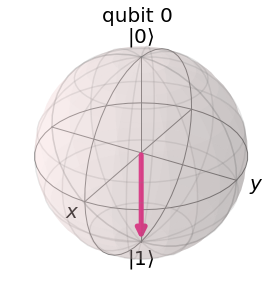

In [8]:
from qiskit.visualization import *
#from qiskit import Aer   # NameError: name 'execute' is not defined
from qiskit import *
aer_backend = Aer.get_backend("statevector_simulator")
out = execute(qc,aer_backend).result().get_statevector()
plot_bloch_multivector(out)

## Random qubit initilization

In [9]:
import random
import math
import cmath

def get_random_qubit_state(debug=False):
    
    # Range of a polar angle is 0 to Pi radians - both inclusive viz., (0,pi)
    polar_angle = random.uniform(0, math.pi)
    
    if(debug):
        print("Polar Angle (theta): ",polar_angle)
    
    # Range of azimulath angle is 0 to 2*Pi radians excluding 2*pi viz., [0,2pi)
    azimuthal_angle = random.uniform(0, 2*math.pi)
    
    if(debug):
        print("Azimuthal Angle (phi): ",azimuthal_angle)
    
    # Generate amplitudes 
    alpha = math.cos(polar_angle/2)
    beta = cmath.exp(azimuthal_angle*1j) * (math.sin(polar_angle/2))  # e^i*theta = cos(theat) + i . sin(theta)
    
    # Validation: Unitarity: sum of squares of complex amplitude 
    test = math.pow(abs(alpha),2) + math.pow(abs(beta),2)
    if(debug):
        print("Unitary test: ",test)
    
    # alpha and beta are 2 complex number representing complex probabilities
    return([alpha,beta])

print(get_random_qubit_state())

[0.7689370547202701, (0.6257450503940678+0.13106844694830977j)]


### Generate random circuit:

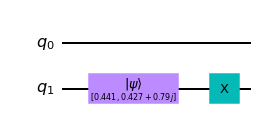

In [10]:
from qiskit import QuantumCircuit
import random 

number_of_qubits = 2
random_initial_ket = get_random_qubit_state()
qubit_index = [i for i in range(number_of_qubits)]

qc = QuantumCircuit(number_of_qubits)

random.shuffle(qubit_index)
#print(qubit_index)

qc.initialize(random_initial_ket,qubit_index[0])

random.shuffle(qubit_index)
#print(qubit_index)

qc.x(qubit_index[0])

qc.draw('mpl')


### Run random circuit:

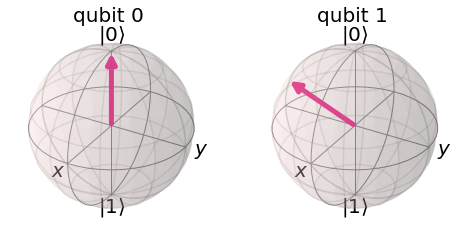

In [11]:
from qiskit.visualization import *
from qiskit import Aer
aer_backend = Aer.get_backend("statevector_simulator")
out = execute(qc,aer_backend).result().get_statevector()
plot_bloch_multivector(out)

# Animating the transform
* 'Only one qubit circuits are supported'
* 'Gate initialized is not supported'

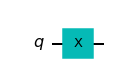

In [12]:
from qiskit.visualization import visualize_transition

from qiskit import QuantumCircuit
import random 

number_of_qubits = 1
random_initial_ket = get_random_qubit_state()
qubit_index = [i for i in range(number_of_qubits)]

qc = QuantumCircuit(number_of_qubits)

random.shuffle(qubit_index)
#print(qubit_index)

#qc.initialize(random_initial_ket,qubit_index[0])

random.shuffle(qubit_index)
#print(qubit_index)

qc.x(qubit_index[0])

qc.draw('mpl')



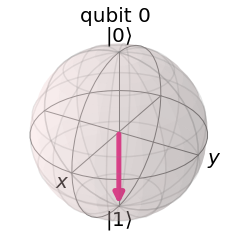

In [13]:
from qiskit.visualization import *
from qiskit import Aer
aer_backend = Aer.get_backend("statevector_simulator")
out = execute(qc,aer_backend).result().get_statevector()
plot_bloch_multivector(out)

In [ ]:
# Note 1: VisualizationError: 'Only one qubit circuits are supported'
# Noet 2: VisualizationError: 'Gate initialize is not supported'

visualize_transition(qc) 


# Plotting histogram

In [15]:
from qiskit.visualization import plot_histogram  # Note this import

In [35]:
from qiskit.visualization import visualize_transition

from qiskit import QuantumCircuit
import random 

number_of_qubits = 4
random_initial_kets = [get_random_qubit_state() for i in range(number_of_qubits)] 
qubit_index = [i for i in range(number_of_qubits)]

qc = QuantumCircuit(number_of_qubits)

#random.shuffle(qubit_index)
#print(qubit_index)

for i in range(number_of_qubits):
    qc.initialize(random_initial_kets[i],qubit_index[i])

random.shuffle(qubit_index)
#print(qubit_index)
qc.x(qubit_index[0])

qc.draw()
#qc.draw('mpl')

┌────────────────────────────────────────┐     
q_0: ┤ Initialize(0.73928,-0.67205-0.042541j) ├─────
     └┬──────────────────────────────────────┬┘     
q_1: ─┤ Initialize(0.92702,0.06321-0.36966j) ├──────
     ┌┴──────────────────────────────────────┤ ┌───┐
q_2: ┤ Initialize(0.39837,-0.90664+0.13897j) ├─┤ X ├
     ├───────────────────────────────────────┴┐└───┘
q_3: ┤ Initialize(0.044924,-0.15274-0.98724j) ├─────
     └────────────────────────────────────────┘

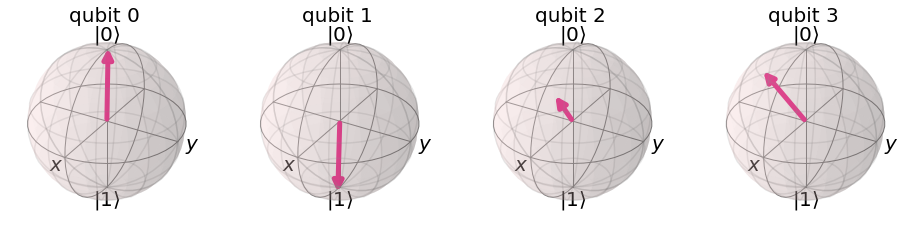

In [31]:
from qiskit.visualization import *
from qiskit import Aer
aer_backend = Aer.get_backend("statevector_simulator")
out = execute(qc,aer_backend).result().get_statevector()
plot_bloch_multivector(out)

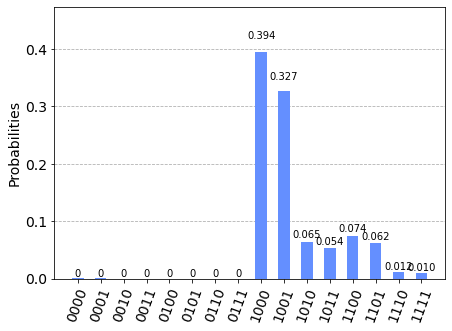

In [36]:
plot_histogram(execute(qc,aer_backend).result().get_counts())